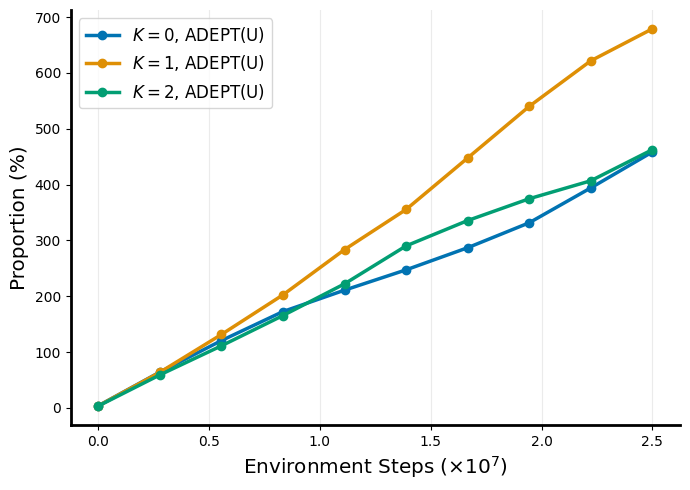

In [5]:
from logging import root
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import os

envs = ['bigfish', 'bossfight', 'caveflyer', 'chaser', 'climber', 'coinrun', 'dodgeball', 'fruitbot',
        'heist', 'jumper', 'leaper', 'maze', 'miner', 'ninja', 'plunder', 'starpilot']

fig, ax = plt.subplots(figsize=(7, 5))

colors = sns.color_palette("colorblind")
legends = ['$K=0$', '$K=1$', '$K=2$']
fake_patches = [Patch(color=colors[i], label=legends[i]) for i in range(len(legends))]
num_phases = 10
phases = np.linspace(10, 1525, num=num_phases, dtype=int)

counts = {0: np.zeros(shape=(num_phases)), 1: np.zeros(shape=(num_phases)), 2: np.zeros(shape=(num_phases))}
root = '../data/ppo_ucb_runs_lr_vfc_bs'
for idx, env in enumerate(envs):
    all_clusters = []
    for dir in os.listdir(root):
        if env in dir:
            data = np.load(os.path.join(root, dir), allow_pickle=True)
        all_clusters.append(data["data"].item()['h2o/cluster_idx'])
    all_clusters = np.array(all_clusters)

    for j, phase in enumerate(phases):
        counts[0][j] += np.where(all_clusters[:, :phase] == 0)[0].shape[0]
        counts[1][j] += np.where(all_clusters[:, :phase] == 1)[0].shape[0]
        counts[2][j] += np.where(all_clusters[:, :phase] == 2)[0].shape[0]
for k, hp in enumerate([0, 1, 2]):
    ax.plot(np.linspace(0, 2.5, num_phases), counts[hp] / 3 / 16 / 1525 * 100, label=legends[k]+', ADEPT(U)', linewidth=2.5, color=colors[k], marker='o')

ax.set_title(None)
ax.legend(loc='upper left', fontsize='large')
ax.set_ylabel('Proportion (%)', fontsize='x-large')
ax.set_xlabel(r'Environment Steps ($\times 10^7$)', fontsize='x-large')

ax.grid(True, axis="x", alpha=0.25)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)

fig.tight_layout()

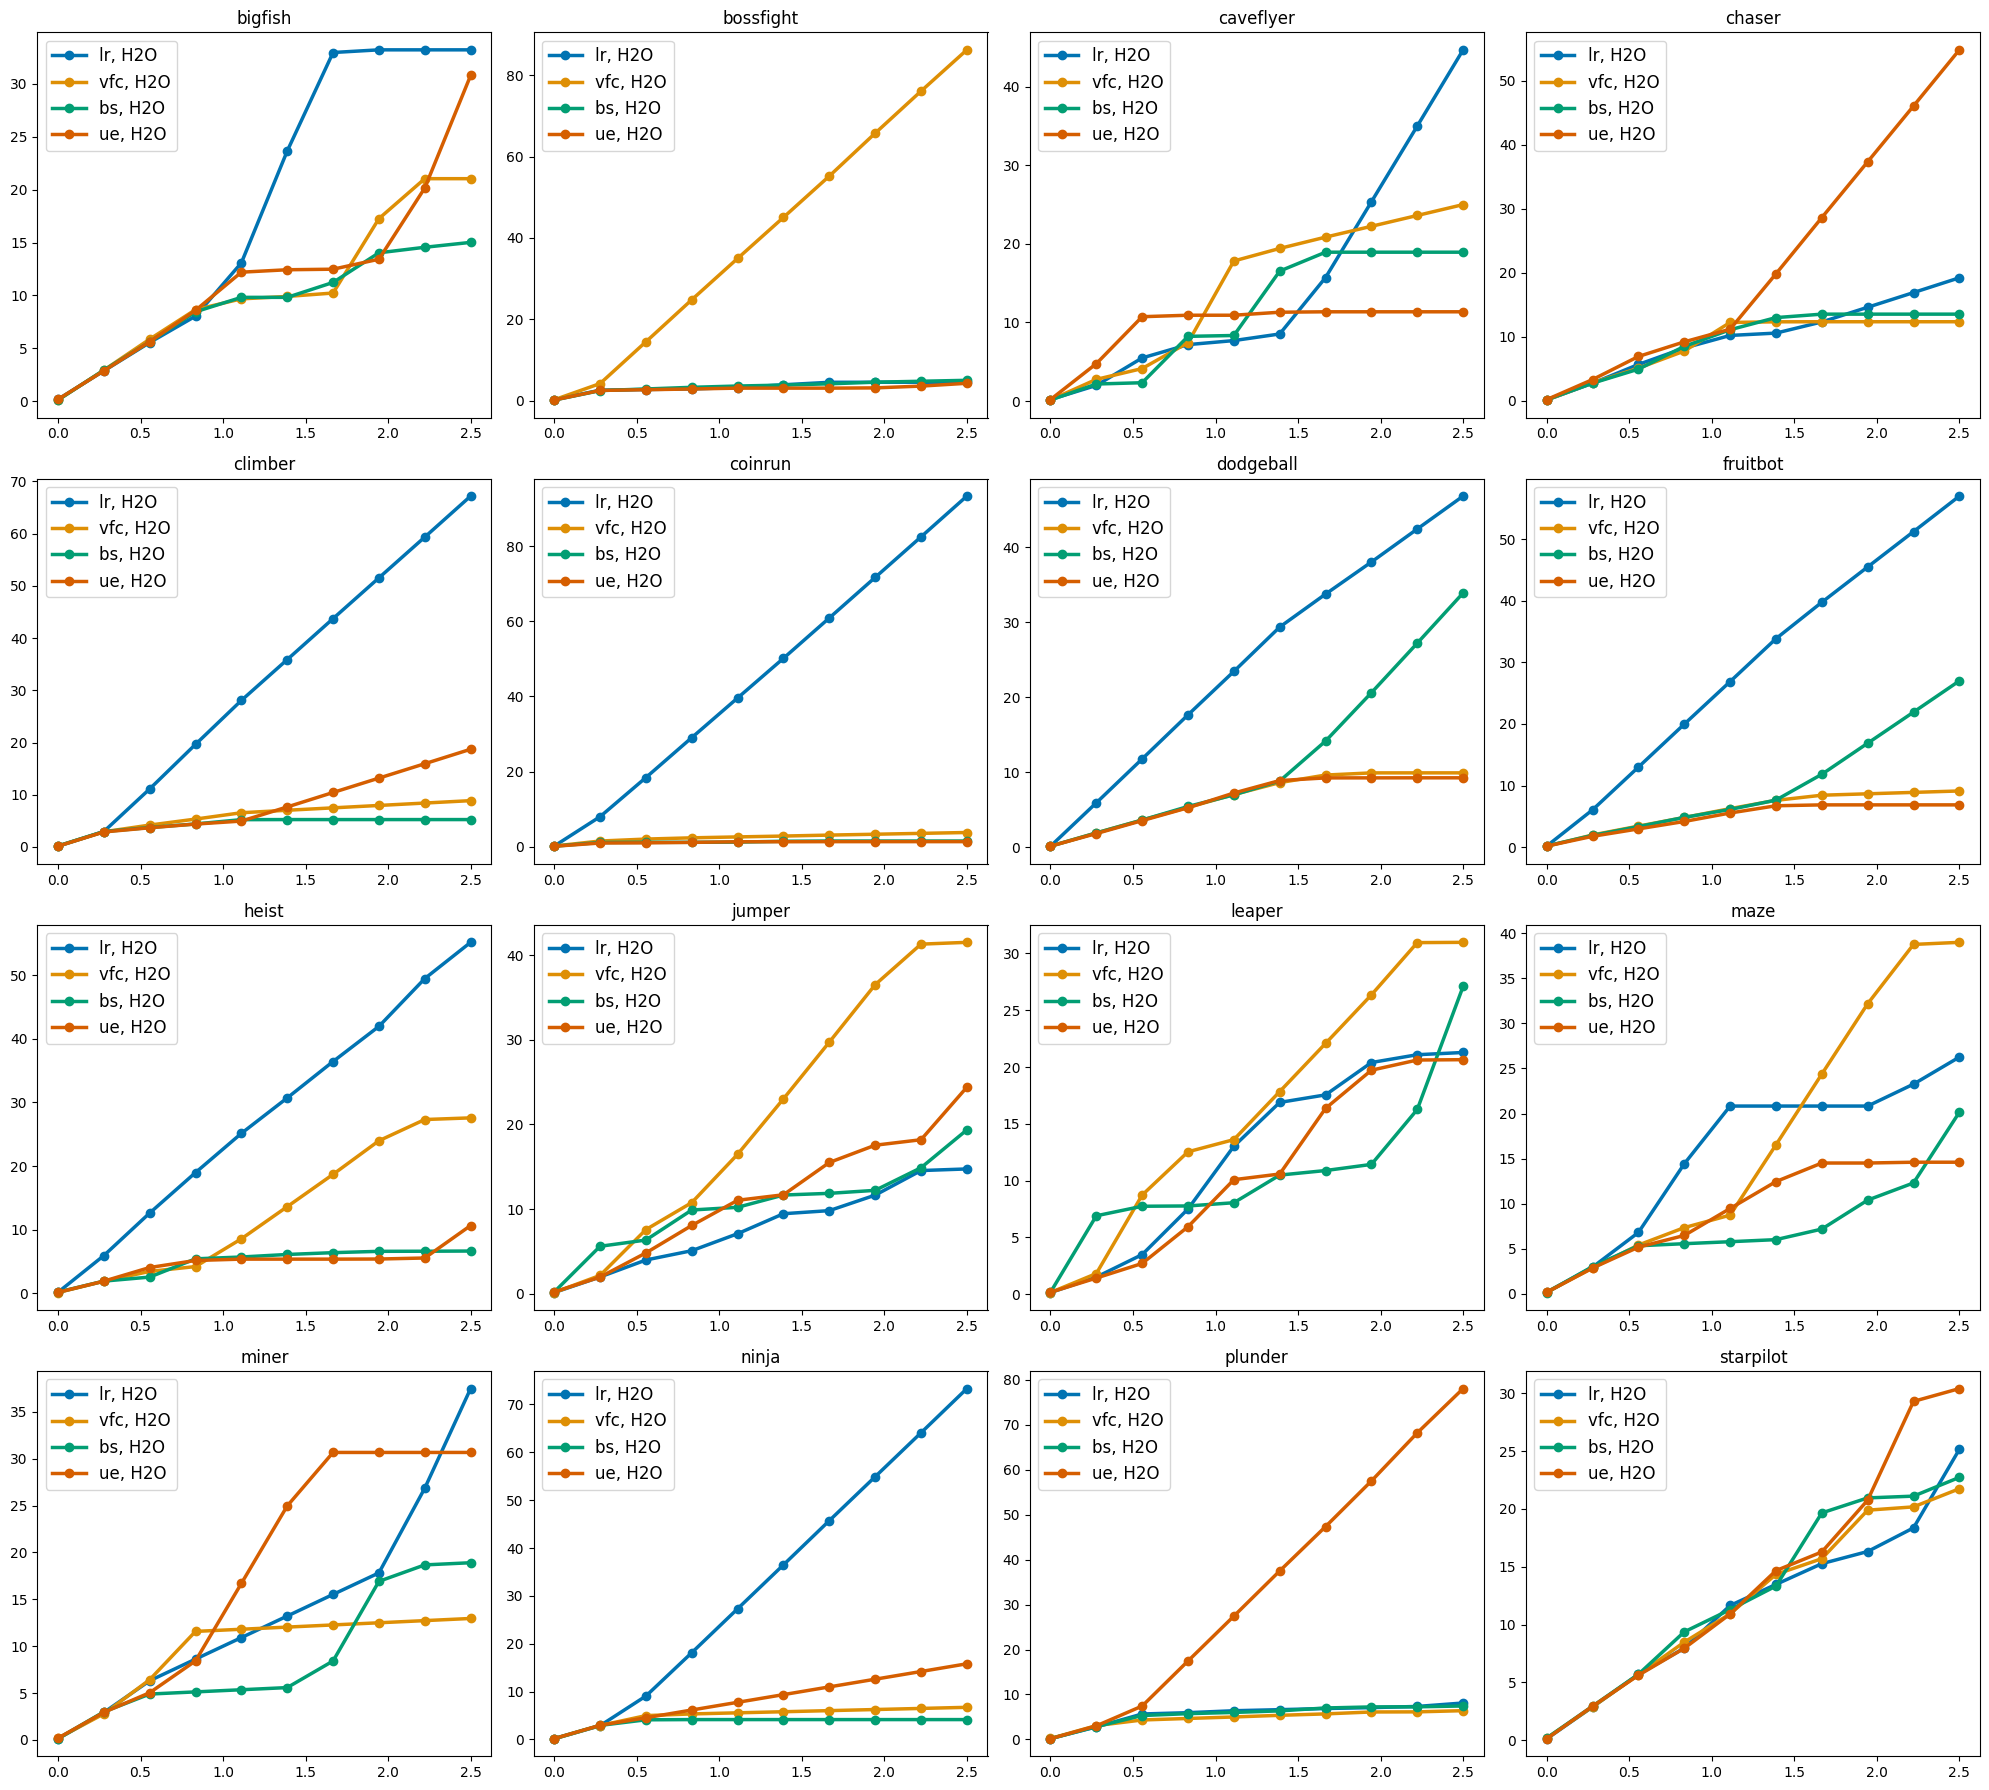

In [ ]:
from logging import root
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
import os

envs = ['bigfish', 'bossfight', 'caveflyer', 'chaser', 'climber', 'coinrun', 'dodgeball', 'fruitbot',
        'heist', 'jumper', 'leaper', 'maze', 'miner', 'ninja', 'plunder', 'starpilot']
env_to_cluster = {env: None for env in envs}

fig, axes = plt.subplots(4, 4, figsize=(20, 18))

colors = sns.color_palette("colorblind")
legends = ['lr', 'vfc', 'bs', 'ue']
fake_patches = [Patch(color=colors[i], label=legends[i]) for i in range(len(legends))]
num_phases = 10
phases = np.linspace(10, 1525, num=num_phases, dtype=int)

root = '../data/ppo_ucb_runs_lr_vfc_bs_ue'
for idx, env in enumerate(envs):
    ax = axes.flatten()[idx]
    all_clusters = []
    for dir in os.listdir(root):
        if env in dir:
            data = np.load(os.path.join(root, dir), allow_pickle=True)
        all_clusters.append(data["data"].item()['h2o/cluster_idx'])
    all_clusters = np.array(all_clusters)
    counts = {_: np.zeros(shape=(num_phases)) for _ in range(len(legends))}
    for j, phase in enumerate(phases):
        for i, legend in enumerate(legends):
            counts[i][j] += np.where(all_clusters[:, :phase] == i)[0].shape[0]

    for k, hp in enumerate(range(len(legends))):
        ax.plot(np.linspace(0, 2.5, num_phases), counts[hp] / 3 / 16 / 1525 * 100, label=legends[k]+', H2O', linewidth=2.5, color=colors[k], marker='o')

    ax.set_title(envs[idx])
    ax.legend(loc='upper left', fontsize='large')
    # find the best cluster
    env_to_cluster[env] = np.argmax([counts[i][-1] for i in range(len(legends))])
    env_to_cluster[env] = legends[env_to_cluster[env]]


# ax.set_ylabel('Proportion (%)', fontsize='x-large')
# ax.set_xlabel(r'Environment Steps ($\times 10^7$)', fontsize='x-large')

# ax.grid(True, axis="x", alpha=0.25)
# ax.spines["right"].set_visible(False)
# ax.spines["top"].set_visible(False)
# ax.spines["left"].set_linewidth(2)
# ax.spines["bottom"].set_linewidth(2)

fig.tight_layout()

In [6]:
env_to_cluster

{'bigfish': 'lr',
 'bossfight': 'vfc',
 'caveflyer': 'lr',
 'chaser': 'ue',
 'climber': 'lr',
 'coinrun': 'lr',
 'dodgeball': 'lr',
 'fruitbot': 'lr',
 'heist': 'lr',
 'jumper': 'vfc',
 'leaper': 'vfc',
 'maze': 'vfc',
 'miner': 'lr',
 'ninja': 'lr',
 'plunder': 'ue',
 'starpilot': 'ue'}

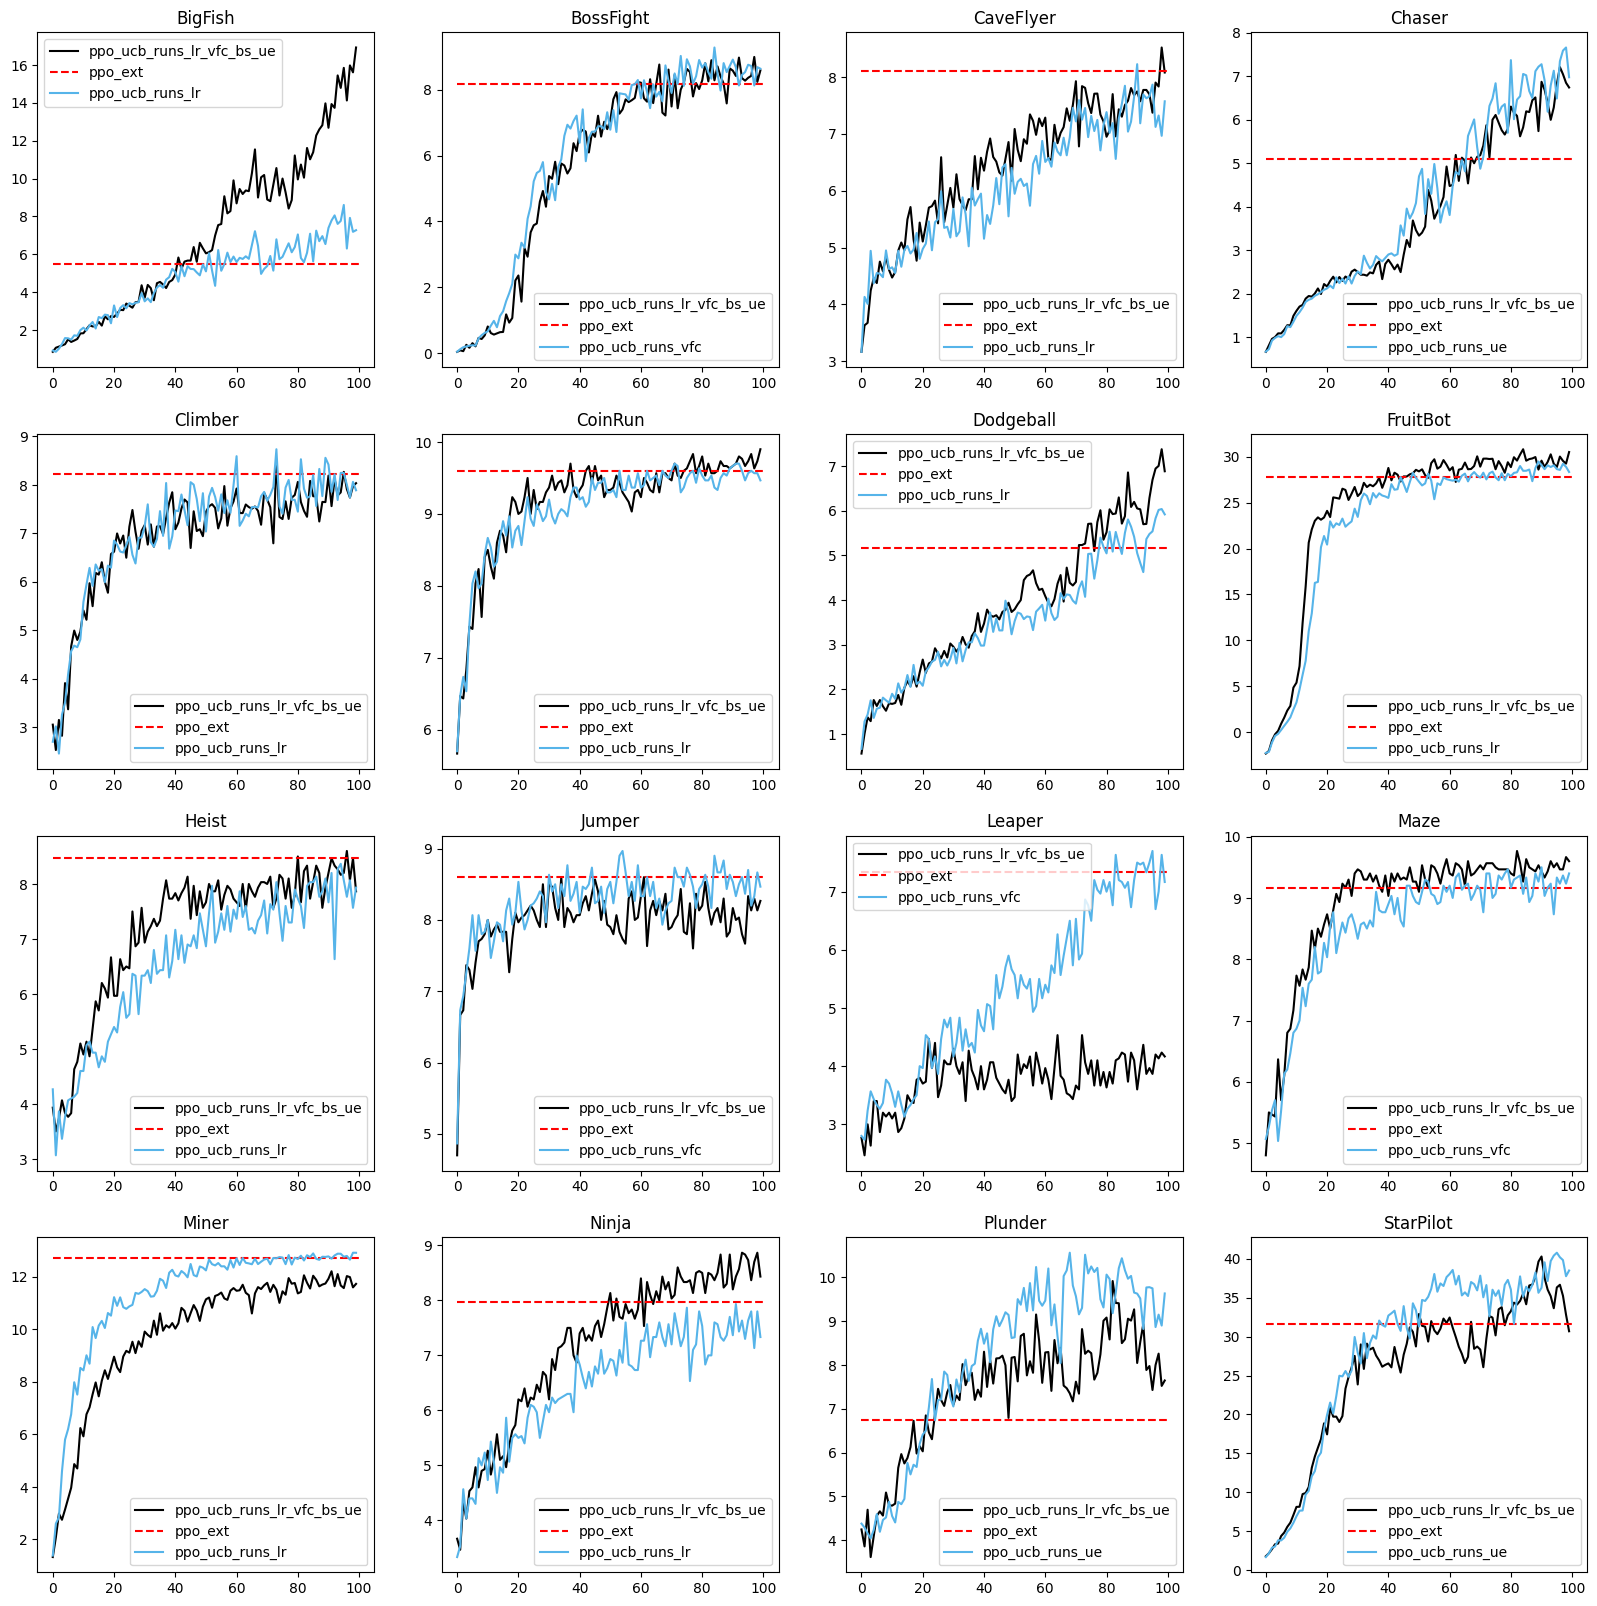

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

env_to_cluster = {'bigfish': 'lr',
 'bossfight': 'vfc',
 'caveflyer': 'lr',
 'chaser': 'ue',
 'climber': 'lr',
 'coinrun': 'lr',
 'dodgeball': 'lr',
 'fruitbot': 'lr',
 'heist': 'lr',
 'jumper': 'vfc',
 'leaper': 'vfc',
 'maze': 'vfc',
 'miner': 'lr',
 'ninja': 'lr',
 'plunder': 'ue',
 'starpilot': 'ue'}

def sliding_window_smooth(values, window_size=5):
    num_runs, num_points = values.shape
    new_num_points = num_points // window_size  # Number of windows per run
    smoothed_values = np.zeros((num_runs, new_num_points))

    for i in range(num_runs):
        for j in range(new_num_points):
            # Compute the average of each non-overlapping window
            start_idx = j * window_size
            end_idx = start_idx + window_size
            smoothed_values[i, j] = np.mean(values[i, start_idx:end_idx])
    
    return smoothed_values

envs = ['bigfish', 'bossfight', 'caveflyer', 'chaser', 'climber', 'coinrun', 'dodgeball', 'fruitbot',
        'heist', 'jumper', 'leaper', 'maze', 'miner', 'ninja', 'plunder', 'starpilot'
        ]
names = ['BigFish', 'BossFight', 'CaveFlyer', 'Chaser', 'Climber', 'CoinRun', 'Dodgeball', 'FruitBot',
            'Heist', 'Jumper', 'Leaper', 'Maze', 'Miner', 'Ninja', 'Plunder', 'StarPilot'
        ]

fig, axes = plt.subplots(4, 4, figsize=(20, 20))

colors = sns.color_palette("colorblind")
algos = ['ppo_ext', 
        #  'ppo_ucb_runs_lr_vfc', 
        #  'ppo_ucb_runs_lr_bs', 
        #  'ppo_ucb_runs_lr_vfc_bs'
        # 'ppo_ucb_runs_vfc', 
        # 'ppo_ucb_runs_lr', 
        'ppo_ucb_runs_lr_vfc_bs_ue',
        'ppo_ucb_runs_bs'
         ]

cluster_to_algo = {
    'lr': 'ppo_ucb_runs_lr',
    'vfc': 'ppo_ucb_runs_vfc',
    'bs': 'ppo_ucb_runs_bs',
    'ue': 'ppo_ucb_runs_ue'
}

for idx, env in enumerate(envs):
    ax = axes.flatten()[idx]
    algo = 'ppo_ucb_runs_lr_vfc_bs_ue'
    root = f'../data/{algo}'
    all_returns = []
    for dir in os.listdir(root):
        if env in dir:
            data = np.load(os.path.join(root, dir), allow_pickle=True)
            steps = data["steps"].item()
            values = data["data"].item()
            all_returns.append(values['charts/episodic_return'])

    all_returns = np.stack(all_returns)
    all_returns = sliding_window_smooth(all_returns, 100)
    # print(algo, env, all_returns.shape)
    mean = all_returns.mean(axis=0)
    std = all_returns.std(axis=0)

    ax.plot(np.arange(mean.shape[0]), mean, color='k', label=algo)
    # ax.fill_between(np.arange(mean.shape[0]), mean+std, mean-std, alpha=0.15, color='b')

    algo = 'ppo_ext'
    root = f'../data/{algo}'
    all_returns = []
    for dir in os.listdir(root):
        if env in dir:
            data = np.load(os.path.join(root, dir), allow_pickle=True)
            steps = data["steps"].item()
            values = data["data"].item()
            all_returns.append(values['charts/episodic_return'])

    all_returns = np.stack(all_returns)
    all_returns = sliding_window_smooth(all_returns, 100)
    # print(algo, env, all_returns.shape)
    mean = all_returns.mean(axis=0)
    std = all_returns.std(axis=0)
    ax.hlines(mean[-1], 0, mean.shape[0],  color='r', linestyle='--', label='ppo_ext')

for idx, env in enumerate(envs):
    ax = axes.flatten()[idx]
    algo = cluster_to_algo[env_to_cluster[env]]
    root = f'../data/{algo}'
    all_returns = []
    for dir in os.listdir(root):
        if env in dir:
            data = np.load(os.path.join(root, dir), allow_pickle=True)
            steps = data["steps"].item()
            values = data["data"].item()
            all_returns.append(values['charts/episodic_return'])

    all_returns = np.stack(all_returns)
    all_returns = sliding_window_smooth(all_returns, 100)
    # print(algo, env, all_returns.shape)
    mean = all_returns.mean(axis=0)
    std = all_returns.std(axis=0)

    ax.plot(np.arange(mean.shape[0]), mean, color=colors[j], label=algo)
    # ax.fill_between(np.arange(mean.shape[0]), mean+std, mean-std, alpha=0.15, color=colors[j])

    ax.set_title(names[idx])
    ax.legend()